<a href="https://colab.research.google.com/github/selinzeydan/Medical-Cost-Analysis/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Required Libraries**

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
insurance = pd.read_csv("insurance.csv")

df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## **Perform An Exploratory Data Analysis**

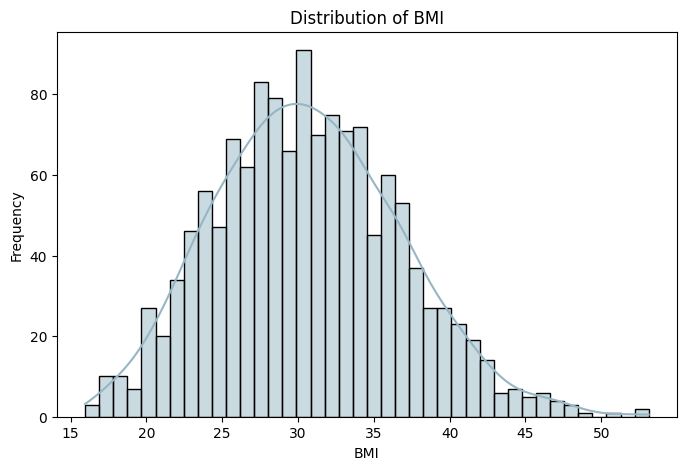

In [12]:
#Question 1: Examine the distribution of BMI (Body Mass Index)
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], bins=40, color='#96B6C5', kde=True)
plt.title('Distribution of BMI')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

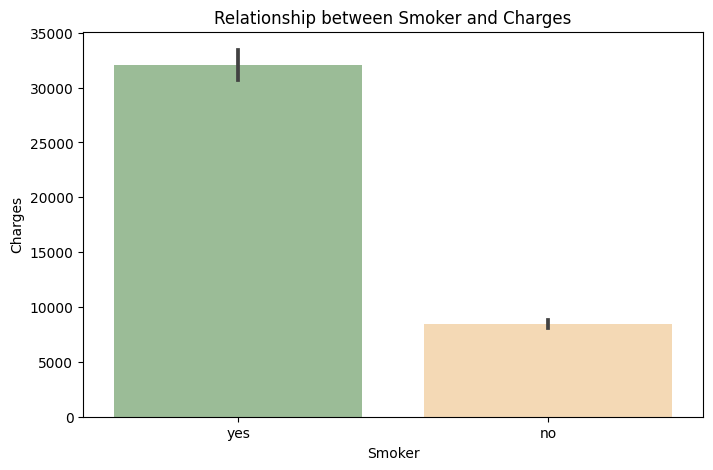

In [13]:
#Question 2:  Examine the relationship between “smoker” and “charges”
plt.figure(figsize=(8, 5))
colors=['#96C291','#FFDBAA']
sns.barplot(x='smoker', y='charges', data=df, palette=colors)
plt.title('Relationship between Smoker and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

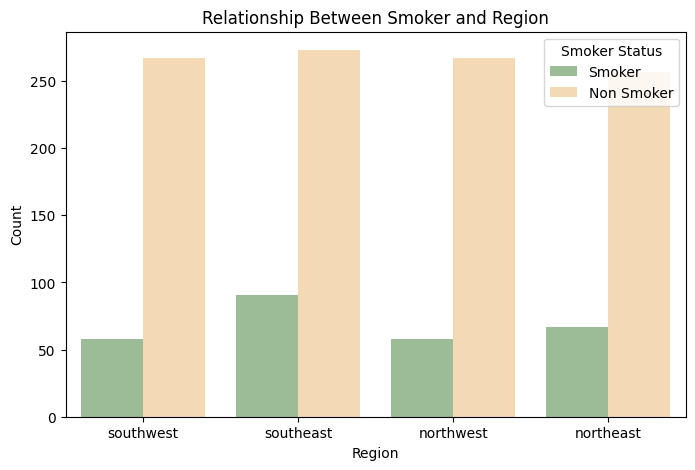

In [14]:
#Examine the relationship between “smoker” and “region”
plt.figure(figsize=(8, 5))
colors=['#96C291','#FFDBAA']
sns.countplot(data=df, x='region', hue='smoker', palette=colors)
plt.title('Relationship Between Smoker and Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker Status', labels=['Smoker', 'Non Smoker'])
plt.show()


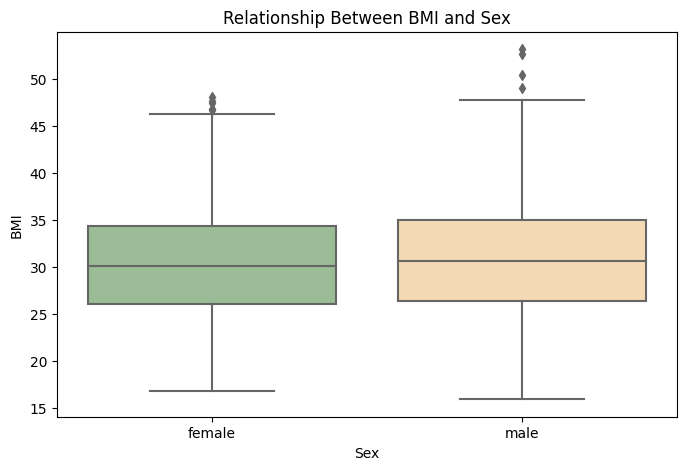

In [15]:
#Examine the relationship between “bmi” and “sex”.
plt.figure(figsize=(8, 5))
colors=['#96C291','#FFDBAA']
sns.boxplot(data=df, x='sex', y='bmi', palette=colors)
plt.title("Relationship Between BMI and Sex")
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()


<ipython-input-15-cc64d4c60db9>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').sum().plot.pie(y= "children", explode=explode, autopct="%1.0f%%", colors=colors)


<Figure size 800x500 with 0 Axes>

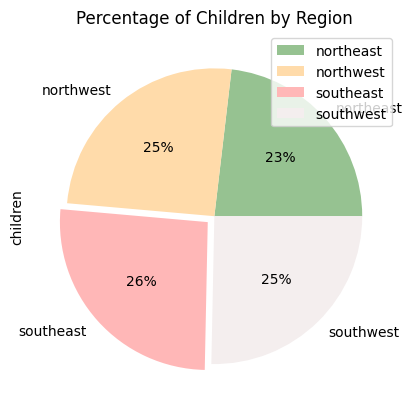

In [15]:
#Find the "region" with the most "children"
plt.figure(figsize=(8, 5))
explode = [0, 0, 0.06, 0]
colors = ['#96C291','#FFDBAA','#FFB7B7','#F4EEEE']
df.groupby('region').sum().plot.pie(y= "children", explode=explode, autopct="%1.0f%%", colors=colors)
plt.title("Percentage of Children by Region")
plt.show()


The region with the most children is Southeast region

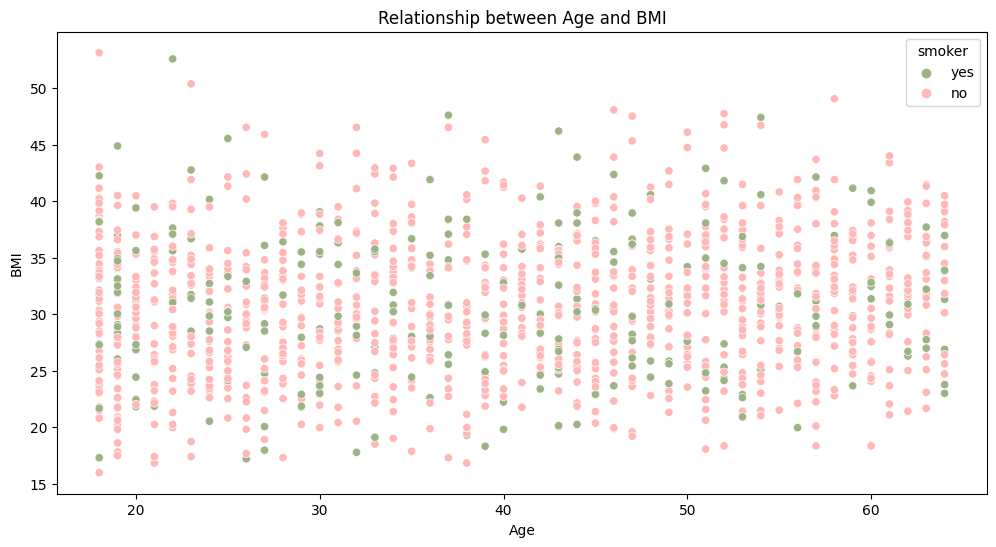

In [16]:
#Examine the relationship between “age” and “bmi”
plt.figure(figsize=(12, 6))
colors=['#9EB384','#FFB7B7']
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker', palette=colors)
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

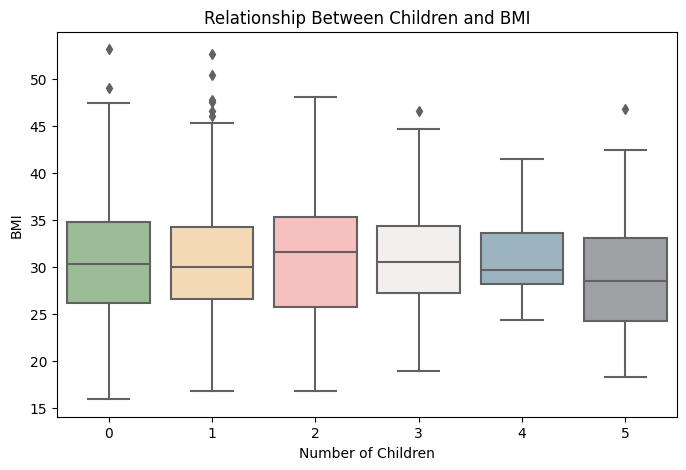

In [17]:
#Examine the relationship between “bmi” and “children”
plt.figure(figsize=(8,5))
colors = ['#96C291','#FFDBAA','#FFB7B7','#F4EEEE', '#96B6C5', '#9E9FA5']
sns.boxplot(data=df, x='children', y='bmi', palette=colors)
plt.title('Relationship Between Children and BMI')
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()

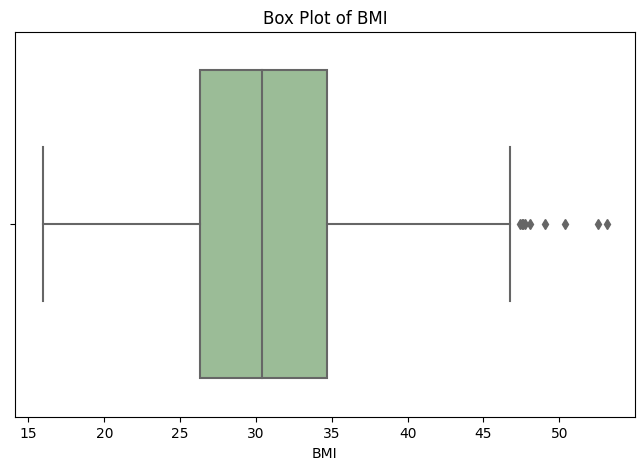

In [18]:
#Is there an outlier in the "bmi" variable? Please review

plt.figure(figsize=(8, 5))
colors = ['#96C291']
sns.boxplot(data=df, x='bmi', palette=colors)
plt.xlabel("BMI")
plt.title("Box Plot of BMI")
plt.show()

In [19]:
#Calculating Outliers
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1


outliers = df[(df['bmi'] < q1 - 1.5 * iqr) | (df['bmi'] > q3 + 1.5 * iqr)]
print("Outlier Counter:", len(outliers))
print(outliers.sort_values("bmi"))

Outlier Counter: 9
      age     sex    bmi  children smoker     region      charges
543    54  female  47.41         0    yes  southeast  63770.42801
401    47    male  47.52         1     no  southeast   8083.91980
860    37  female  47.60         2    yes  southwest  46113.51100
1088   52    male  47.74         1     no  southeast   9748.91060
286    46  female  48.07         2     no  northeast   9432.92530
116    58    male  49.06         0     no  southeast  11381.32540
847    23    male  50.38         1     no  southeast   2438.05520
1047   22    male  52.58         1    yes  southeast  44501.39820
1317   18    male  53.13         0     no  southeast   1163.46270


## **Data Preprocessing**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Prepare features and target variable
X = df.drop(columns=['charges'])
y = df['charges']

In [41]:
#Label Encoding ve One-Hot Encoding
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_region = one_hot_encoder.fit_transform(df[['region']])
encoded_region_df = pd.DataFrame(encoded_region, columns=one_hot_encoder.get_feature_names_out(['region']))

df_encoded = pd.concat([df, encoded_region_df], axis=1)
df_encoded.drop(['region'], axis=1, inplace=True)

# Separation of independent variable X and dependent variable y
X = df_encoded.drop(['charges'], axis=1)
y = df_encoded['charges']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **Model Selection**

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

In [43]:
# List of regression models
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    SVR()
]


In [44]:
# Evaluate models using cross-validation
for model in regression_models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_rmse = np.mean(rmse_scores)
    print(f"{model.__class__.__name__}: Mean RMSE = {mean_rmse:.2f}")

LinearRegression: Mean RMSE = 6147.09
Ridge: Mean RMSE = 6147.00
Lasso: Mean RMSE = 6146.99
RandomForestRegressor: Mean RMSE = 4970.70
SVR: Mean RMSE = 12566.80


In [45]:
 # Choosing the best performing model
best_performing = min(regression_models, key=lambda model: np.mean(np.sqrt(-cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'))))

print(f"Best Model: {best_performing.__class__.__name__}")

Best Model: RandomForestRegressor


## **Hyper-parameter Optimization**

In [46]:
# We define the parameter distributions first, initialise search
# And fit the randomised search to the data
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV


In [48]:
model = LinearRegression()

param_grid = {
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Test RMSE: 5796.2846592762735


In [28]:
random_search.fit(X_train_scaled, y_train)
best_param = random_search.best_params_

print("Best Hyperparameters:", best_param)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'max_depth': 92, 'min_samples_leaf': 16, 'min_samples_split': 6, 'n_estimators': 185}


## **Model Evaluation**

In [53]:
best_max_depth = 92
best_min_samples_leaf = 16
best_min_samples_split = 6
best_n_estimators = 185

best_rf_model = RandomForestRegressor(
    max_depth=best_max_depth,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split,
    n_estimators=best_n_estimators,
    random_state=42
)

best_rf_model.fit(X_train_scaled, y_train)

y_pred = best_rf_model.predict(X_test_scaled)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model:")
print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

mse= mean_squared_error(y_test,y_pred)
print(f"MSE: {mse}")

correlation = y_test.corr(pd.Series(y_pred))
print(f"Correlation Coefficient: {correlation}")


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with Random Forest:", mae)





Random Forest Regressor Model:
RMSE: 4417.138170418424
R-squared Score: 0.8743235488684086
MSE: 19511109.616567425
Correlation Coefficient: -0.040470931287762225
Mean Absolute Error with Random Forest: 2561.336562209185


**References**

1. https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
2. https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
3. https://colorhunt.co/palette/96c291ffdbaaffb7b7f4eeee
4. https://www.kaggle.com/code/hgultekin/box-plots-finding-all-outliers
5. https://scikit-learn.org/stable/modules/cross_validation.html
6. https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics